# Classification Task - Bike Sales

# ***Monish Gosar - J025***

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
df = pd.read_excel('Bike Sales.xlsx')
df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [53]:
df.drop('ID',axis=1,inplace=True)

In [56]:
df.head()

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [58]:
df['Martial Status'] = df['Martial Status'].map({'Married': 1, 'Single': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Home Owner'] = df['Home Owner'].map({'Yes': 1, 'No': 0})
df['Purchased Bike'] = df['Purchased Bike'].map({'Yes': 1, 'No': 0})

In [60]:
df.head()

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,Middle Age,0
1,1,1,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,Middle Age,0
2,1,1,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,Old,0
3,0,1,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,Middle Age,1
4,0,1,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,Middle Age,1


In [62]:
categorical_columns = ['Education', 'Occupation', 'Commute Distance', 'Region', 'Age Brackets']
data_encoded = pd.get_dummies(df, columns=categorical_columns)

In [65]:
X = data_encoded.drop('Purchased Bike', axis=1)
y = data_encoded['Purchased Bike']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=2, validation_split=0.2, verbose=0)


C:\Users\monis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6543 - loss: 1.8685  
Test accuracy: 0.6400


In [71]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [72]:
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       106
           1       0.61      0.63      0.62        94

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200

[[69 37]
 [35 59]]


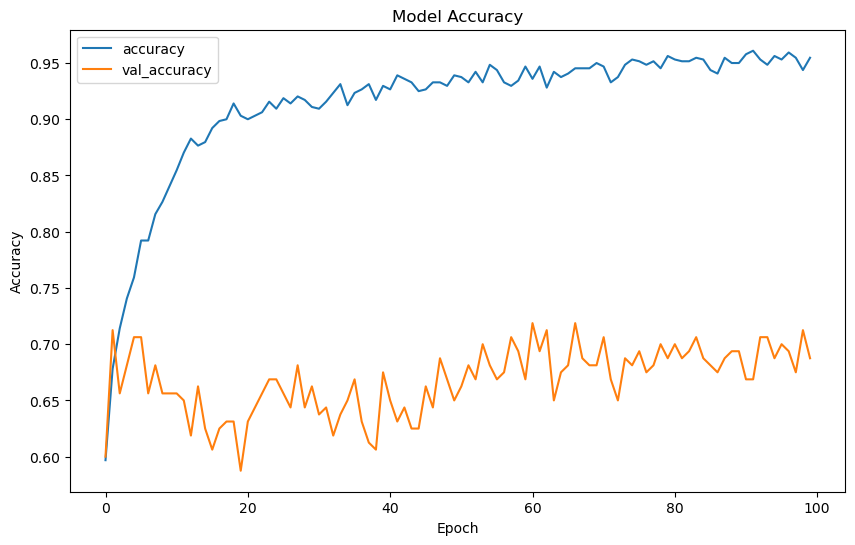

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()